# **Seoul Bike Rental Prediction**

# > **IMPORT LIBERIRES AND READ THE DATA**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
dataset_path = '../input/seoul-bike-rental-ai-pro-iti/'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The shape of the dataset is (5760, 15).




,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# > **EDA**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5760 non-null   int64  
 1   Date                       5760 non-null   object 
 2   y                          5760 non-null   int64  
 3   Hour                       5760 non-null   int64  
 4   Temperature(�C)            5760 non-null   float64
 5   Humidity(%)                5760 non-null   int64  
 6   Wind speed (m/s)           5760 non-null   float64
 7   Visibility (10m)           5760 non-null   int64  
 8   Dew point temperature(�C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)    5760 non-null   float64
 10  Rainfall(mm)               5760 non-null   float64
 11  Snowfall (cm)              5760 non-null   float64
 12  Seasons                    5760 non-null   object 
 13  Holiday                    5760 non-null   objec

In [3]:
df.describe()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,1662.913107,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [4]:
df.isnull().sum()

ID                           0
Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
df[df.duplicated()].count()

ID                           0
Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# > **PREPROCESSING**

In [6]:
le = LabelEncoder()
df["Seasons"] = le.fit_transform(df["Seasons"])
df["Holiday"] = le.fit_transform(df["Holiday"])
df["Functioning Day"] = le.fit_transform(df["Functioning Day"])

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df = df.drop(columns=['Date'])
df.head()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,12
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,12
2,2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,2017,1,12
3,3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,12
4,4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,2017,1,12


In [8]:
df["Temp_hour"] = df["Temperature(�C)"]*df["Hour"]
df["func_hour"] = df["Functioning Day"]*df["Hour"]
#df["holi_hour"] = df["Holiday"]*df["Hour"]
df.head()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,Temp_hour,func_hour
0,0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,12,-0.0,0
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,12,-5.5,1
2,2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,2017,1,12,-12.0,2
3,3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,12,-18.6,3
4,4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,2017,1,12,-24.0,4


In [9]:
#Replacing zeros by np.nan
df_copy = df.copy()
df_copy = df_copy.loc[: , df_copy.columns.isin(['Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)' ])]
df_copy.replace(0, np.nan , inplace = True)
df_copy.isnull().sum()

Wind speed (m/s)             62
Solar Radiation (MJ/m2)    2831
Rainfall(mm)               5428
Snowfall (cm)              5580
dtype: int64

In [10]:
df_copy = df_copy.fillna(df_copy.median()) 
df_copy.isnull().sum()

Wind speed (m/s)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
dtype: int64

In [11]:
df['Wind speed (m/s)']= df_copy['Wind speed (m/s)']
df['Solar Radiation (MJ/m2)']= df_copy['Solar Radiation (MJ/m2)']
df['Rainfall(mm)']= df_copy['Rainfall(mm)']
df['Snowfall (cm)']= df_copy['Snowfall (cm)']
df.head()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,Temp_hour,func_hour
0,0,254,0,-5.2,37,2.2,2000,-17.6,0.92,1.0,1.0,3,1,1,2017,1,12,-0.0,0
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.92,1.0,1.0,3,1,1,2017,1,12,-5.5,1
2,2,173,2,-6.0,39,1.0,2000,-17.7,0.92,1.0,1.0,3,1,1,2017,1,12,-12.0,2
3,3,107,3,-6.2,40,0.9,2000,-17.6,0.92,1.0,1.0,3,1,1,2017,1,12,-18.6,3
4,4,78,4,-6.0,36,2.3,2000,-18.6,0.92,1.0,1.0,3,1,1,2017,1,12,-24.0,4


# > **FEATURES CORRELATION**

In [12]:
corr_matrix=df.corr()
(corr_matrix['y'].sort_values(ascending=False))

y                            1.000000
Temp_hour                    0.675337
Temperature(�C)              0.544281
func_hour                    0.466058
Hour                         0.407180
Dew point temperature(�C)    0.392454
ID                           0.365359
Functioning Day              0.227269
Visibility (10m)             0.214777
year                         0.201837
Wind speed (m/s)             0.111151
day                          0.101981
Solar Radiation (MJ/m2)      0.099492
month                        0.073498
Holiday                      0.058329
Snowfall (cm)               -0.063839
Rainfall(mm)                -0.080664
Humidity(%)                 -0.191603
Seasons                     -0.239315
Name: y, dtype: float64

# > **DATA VISAULIZATION**

<AxesSubplot:>

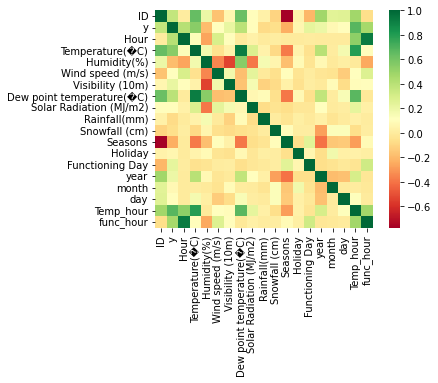

In [13]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

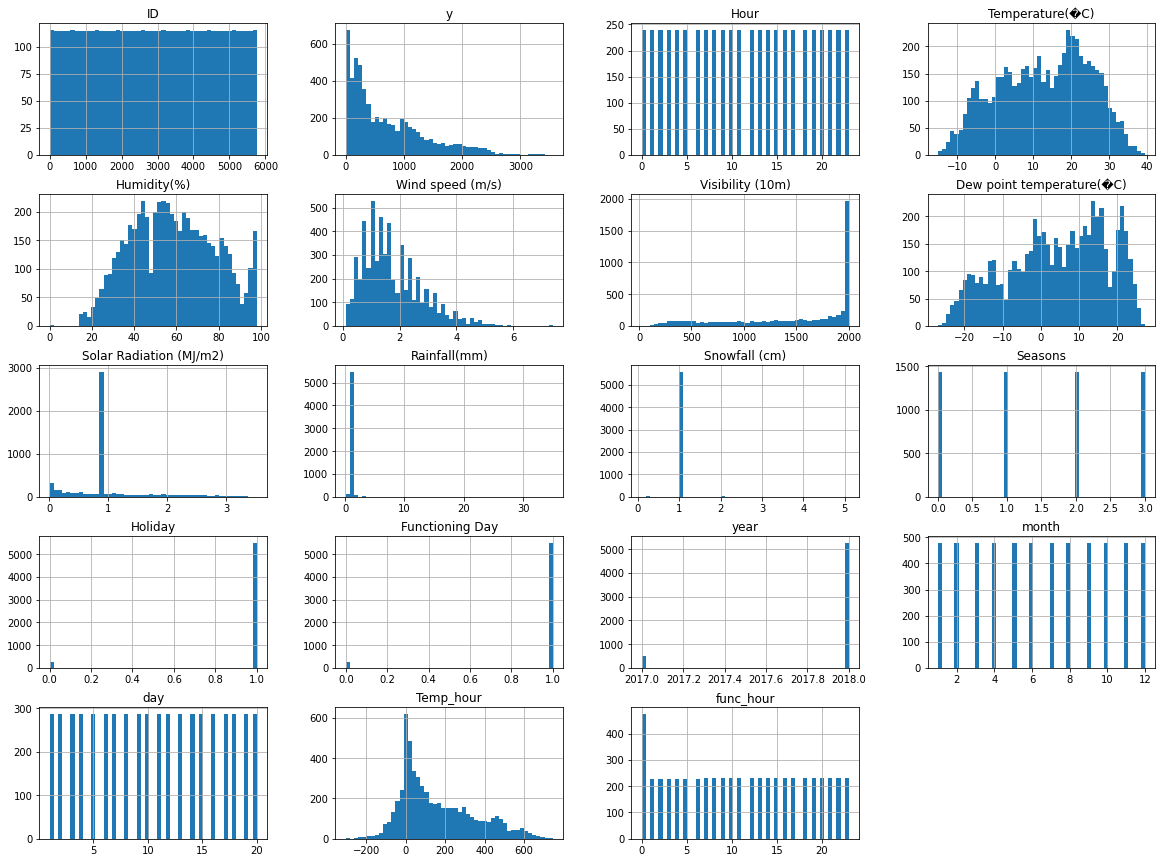

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

# > **FEATURES SELECTION FOR TRAINING**

In [15]:
x=df.drop(['ID','y'], axis=1)
y=df['y']

In [16]:
x.columns

Index(['Hour', 'Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'day', 'Temp_hour',
       'func_hour'],
      dtype='object')

# > **SPLIT DATA**

In [17]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4608, 17) (1152, 17) (4608,) (1152,)


# > **MACHINE LEARNING MODELS**

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
#n_estimators=200

In [20]:
#Fit the trained model
rf.fit(X_train,y_train)

#Cross validation prediction
predict=rf.predict(X_test)
print(predict.shape)

(1152,)


In [21]:
rf.score(X_test,y_test)

0.8708311675161

In [22]:
from sklearn.metrics import mean_squared_log_error 
print ('RMSLE:' + str(np.sqrt(mean_squared_log_error ( predict , y_test) )))

RMSLE:0.5397773292404746


In [23]:
from sklearn.metrics import mean_squared_error
print ('MSE:' + str(np.sqrt(mean_squared_error ( predict , y_test) )))

MSE:234.81152154403836


# > **DATA TEST**

In [24]:
dataset_path = '../input/seoul-bike-rental-ai-pro-iti/'

test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

test_df.head()

The shape of the dataset is (5760, 19).




,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,5760,21/12/2017,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes
1,5761,21/12/2017,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes
2,5762,21/12/2017,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,Winter,No Holiday,Yes
3,5763,21/12/2017,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,Winter,No Holiday,Yes
4,5764,21/12/2017,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,Winter,No Holiday,Yes


In [25]:
le = LabelEncoder()
test_df["Seasons"] = le.fit_transform(test_df["Seasons"])
test_df["Holiday"] = le.fit_transform(test_df["Holiday"])
test_df["Functioning Day"] = le.fit_transform(test_df["Functioning Day"])

In [26]:
test_df["Date"] = pd.to_datetime(test_df["Date"])
test_df['year'] = test_df['Date'].dt.year
test_df['month'] = test_df['Date'].dt.month
test_df['day'] = test_df['Date'].dt.day
test_df = test_df.drop(columns=['Date'])

In [27]:
test_df["Temp_hour"] = test_df["Temperature(�C)"]*df["Hour"]
test_df["func_hour"] = test_df["Functioning Day"]*df["Hour"]
test_df.head()

,ID,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,Temp_hour,func_hour
0,5760,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,3,1,1,2017,12,21,-0.0,0.0
1,5761,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,3,1,1,2017,12,21,-1.8,1.0
2,5762,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,3,1,1,2017,12,21,-4.4,2.0
3,5763,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,3,1,1,2017,12,21,-8.7,3.0
4,5764,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,3,1,1,2017,12,21,-14.4,4.0


In [28]:
y_test_predicted = rf.predict(test_df.drop(columns =['ID']))
test_df['y'] = y_test_predicted
test_df

,ID,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,Temp_hour,func_hour,y
0,5760,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,3,1,1,2017,12,21,-0.0,0.0,188.61
1,5761,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,3,1,1,2017,12,21,-1.8,1.0,186.07
2,5762,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,3,1,1,2017,12,21,-4.4,2.0,174.14
3,5763,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,3,1,1,2017,12,21,-8.7,3.0,103.67
4,5764,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,3,1,1,2017,12,21,-14.4,4.0,62.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1,2018,11,30,79.8,19.0,843.39
2996,8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1,2018,11,30,68.0,20.0,962.64
2997,8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1,2018,11,30,54.6,21.0,1160.94
2998,8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1,2018,11,30,46.2,22.0,1072.34


# > **SUBMISSION**

In [29]:
test_df[['ID', 'y']].to_csv('submission3.csv', index=False)